In [1]:
from autenticazione.autenticazione import start_kaggle
start_kaggle()


In [2]:
# Secondo passo: Download del dataset
# Visualizzare la lista dei dataset
import kaggle

key_search = "covid"

datasets = kaggle.api.datasets_list(search=key_search)

In [3]:
# stampo la lista dei dataset
# la lista di dataset è una lista di dizionari, il cui valore di owner e' contenuto nella key 'ref'
for dataset in datasets:
    print(dataset['ref'])

imdevskp/corona-virus-report
meirnizri/covid19-dataset
sudalairajkumar/covid19-in-india
tawsifurrahman/covid19-radiography-database
gpreda/covid-world-vaccination-progress
roche-data-science-coalition/uncover
andrewmvd/covid19-ct-scans
georgesaavedra/covid19-dataset
hendratno/covid19-indonesia
atilamadai/covid19
sudalairajkumar/covid19-in-usa
sudalairajkumar/covid19-in-italy
iamhungundji/covid19-symptoms-checker
gpreda/covid19-tweets
allen-institute-for-ai/CORD-19-research-challenge
fireballbyedimyrnmom/us-counties-covid-19-dataset
mariaren/covid19-healthy-diet-dataset
tunguz/covid19-genomes
bachrr/covid-chest-xray
kaushiksuresh147/covidvaccine-tweets


In [4]:
# scelgo il dataset che mi interessa e lo scarico
# imposto il path in cui scaricare il dataset
# path = os.path.dirname(os.path.abspath(__file__)) + '/dataset' su juptyer notebook non funziona
# usare invece sys.path[0] + '/dataset' con la libreria sys
import sys
path = sys.path[0] + '/dataset'

# scelgo il dataset che mi interessa
dt_scelto = 'sudalairajkumar/covid19-in-italy'

# scarico il dataset
kaggle.api.dataset_download_files(dt_scelto, path=path, unzip=True)

In [5]:
# ispeziono il dataset
# creo un dataframe con il dataset
import pandas as pd
df = pd.read_csv(path + '/covid19_italy_region.csv')

# stampo le prime 5 righe del dataframe
df_abruzzo = df[df['RegionCode'] == 13]

# stampo le prime 5 righe del dataframe
print(df_abruzzo.head())

# analizzo il dataset
df_abruzzo.info()

    SNo                 Date Country  RegionCode RegionName   Latitude  \
0     0  2020-02-24T18:00:00     ITA          13    Abruzzo  42.351222   
21   21  2020-02-25T18:00:00     ITA          13    Abruzzo  42.351222   
42   42  2020-02-26T18:00:00     ITA          13    Abruzzo  42.351222   
63   63  2020-02-27T18:00:00     ITA          13    Abruzzo  42.351222   
84   84  2020-02-28T18:00:00     ITA          13    Abruzzo  42.351222   

    Longitude  HospitalizedPatients  IntensiveCarePatients  \
0   13.398438                     0                      0   
21  13.398438                     0                      0   
42  13.398438                     0                      0   
63  13.398438                     1                      0   
84  13.398438                     1                      0   

    TotalHospitalizedPatients  HomeConfinement  CurrentPositiveCases  \
0                           0                0                     0   
21                          0         

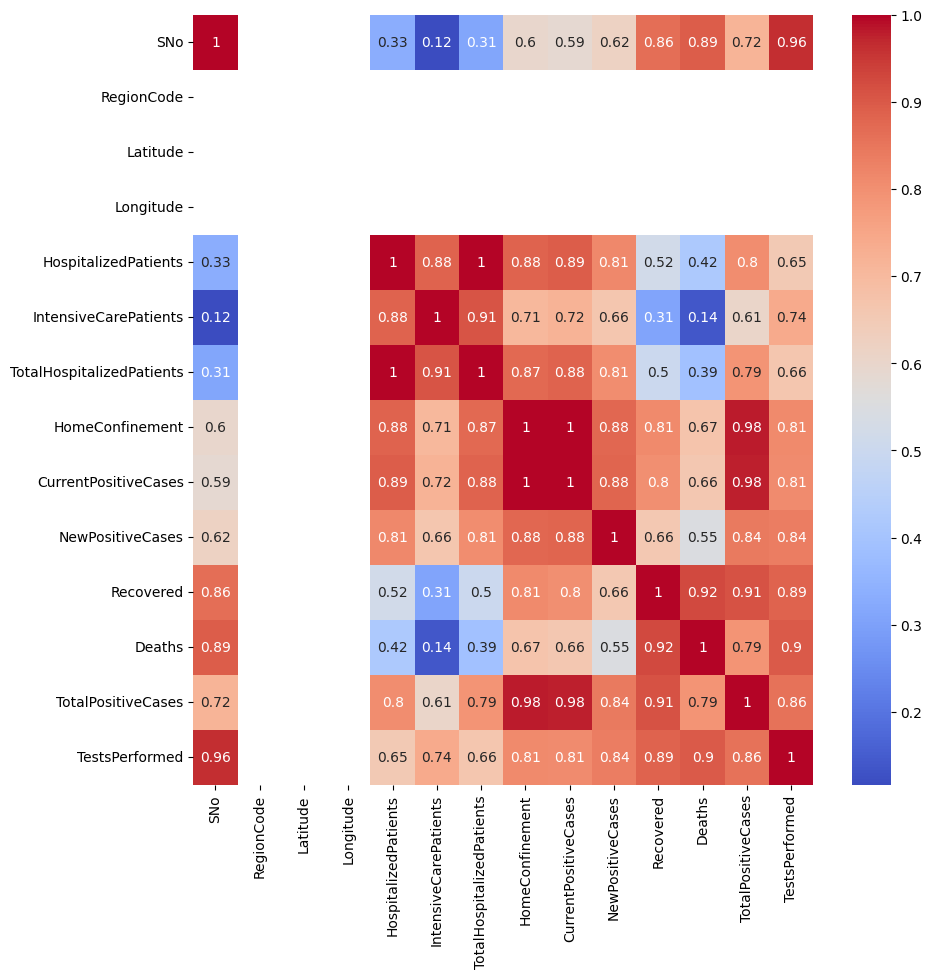

In [6]:
# analizziamo le correlazioni
corr = df_abruzzo.corr()

# plotto le correlazioni
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

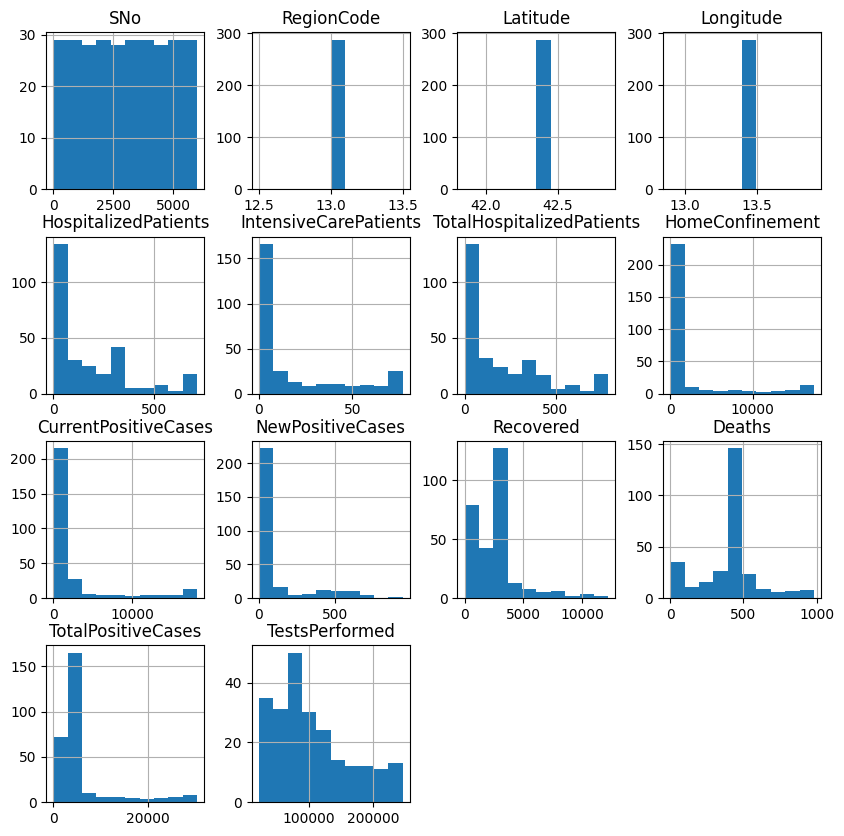

In [7]:
# analizziamo i dati con degli istogrammi
df_abruzzo.hist(figsize=(10,10))
plt.show()

['HospitalizedPatients', 'IntensiveCarePatients', 'TotalHospitalizedPatients', 'HomeConfinement', 'CurrentPositiveCases', 'NewPositiveCases', 'Recovered', 'Deaths', 'TotalPositiveCases', 'TestsPerformed']


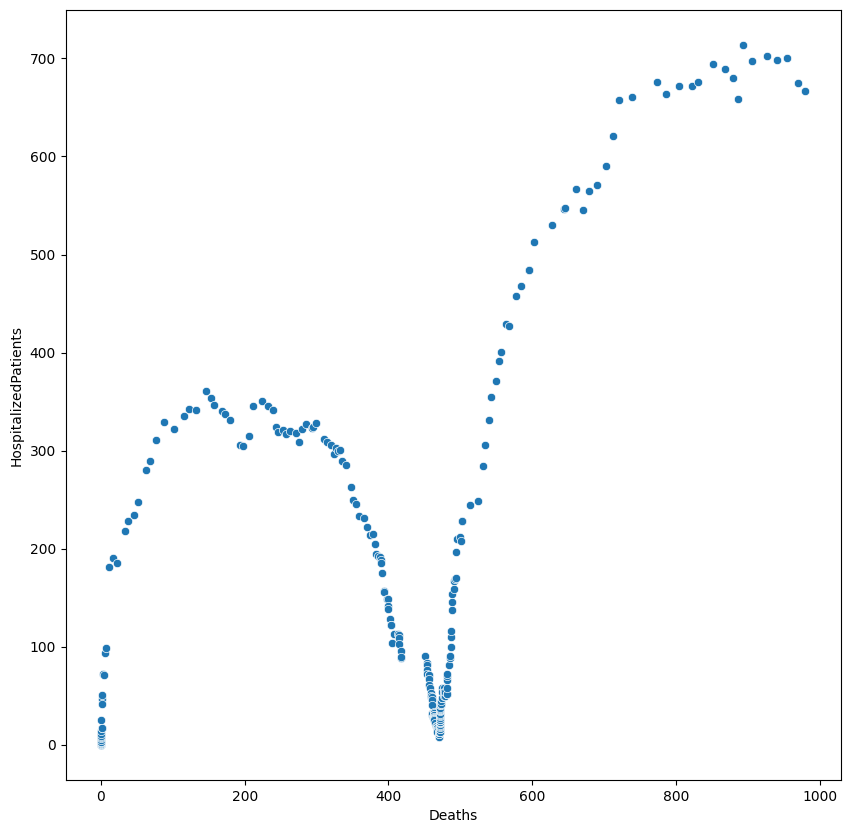

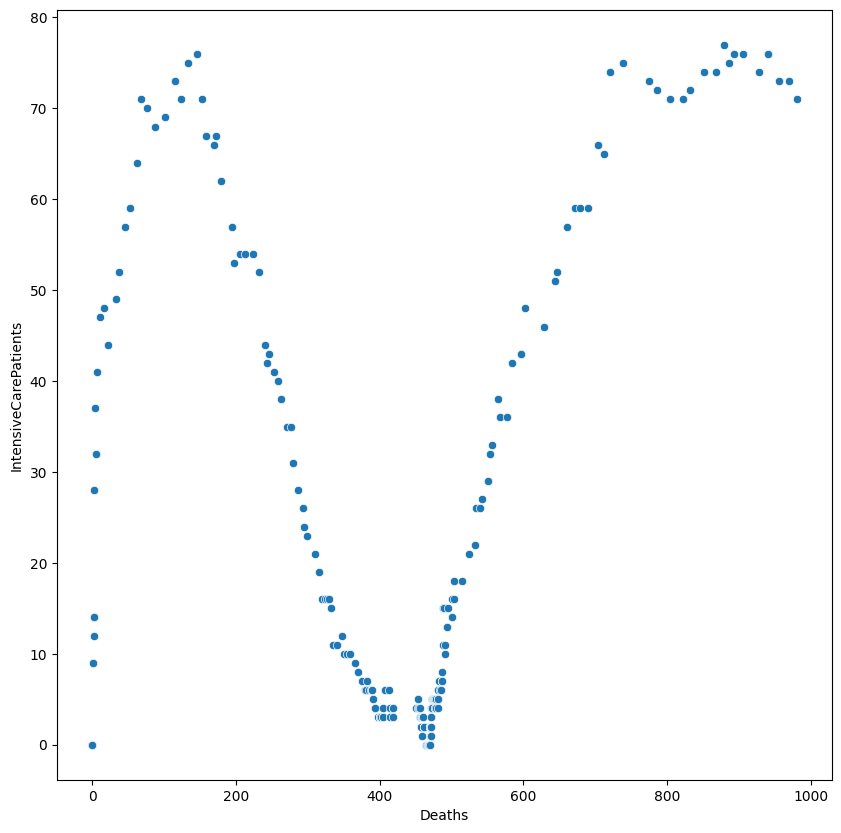

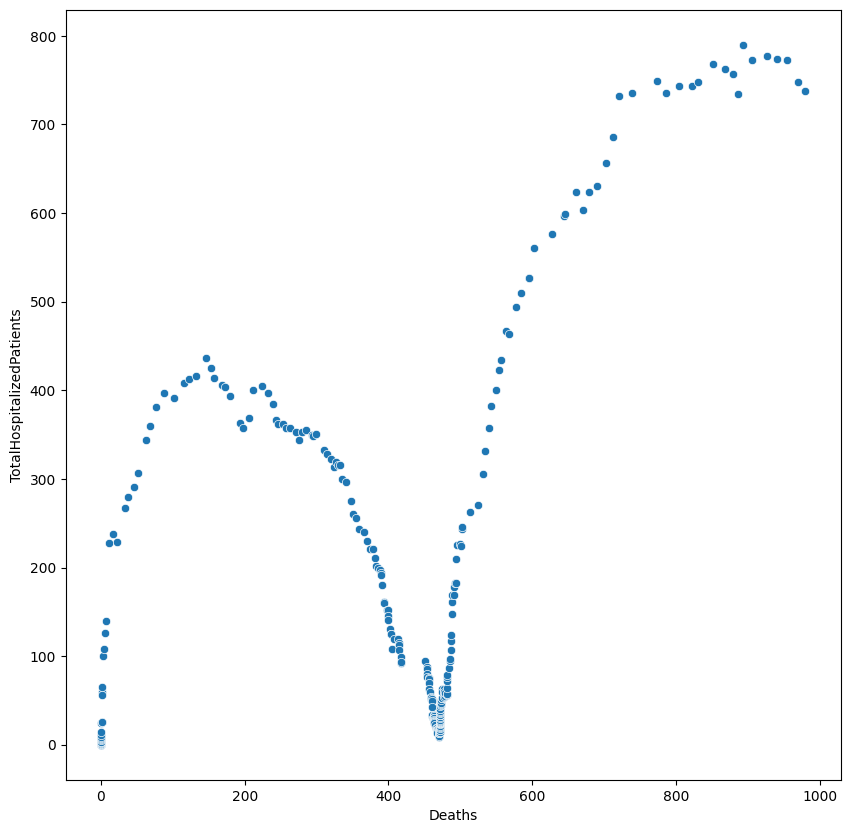

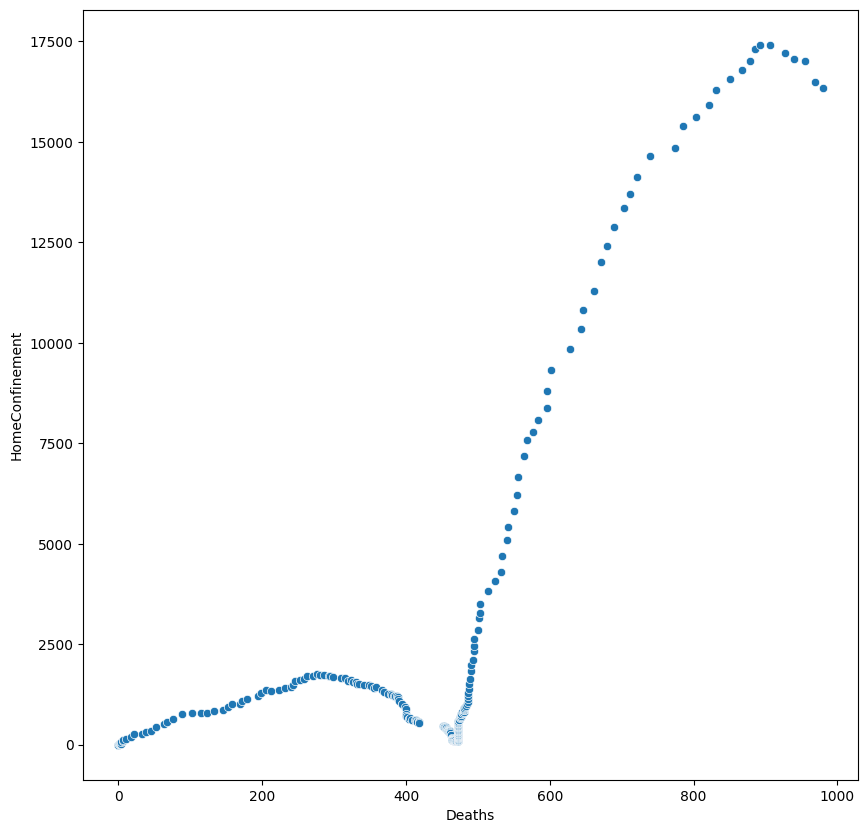

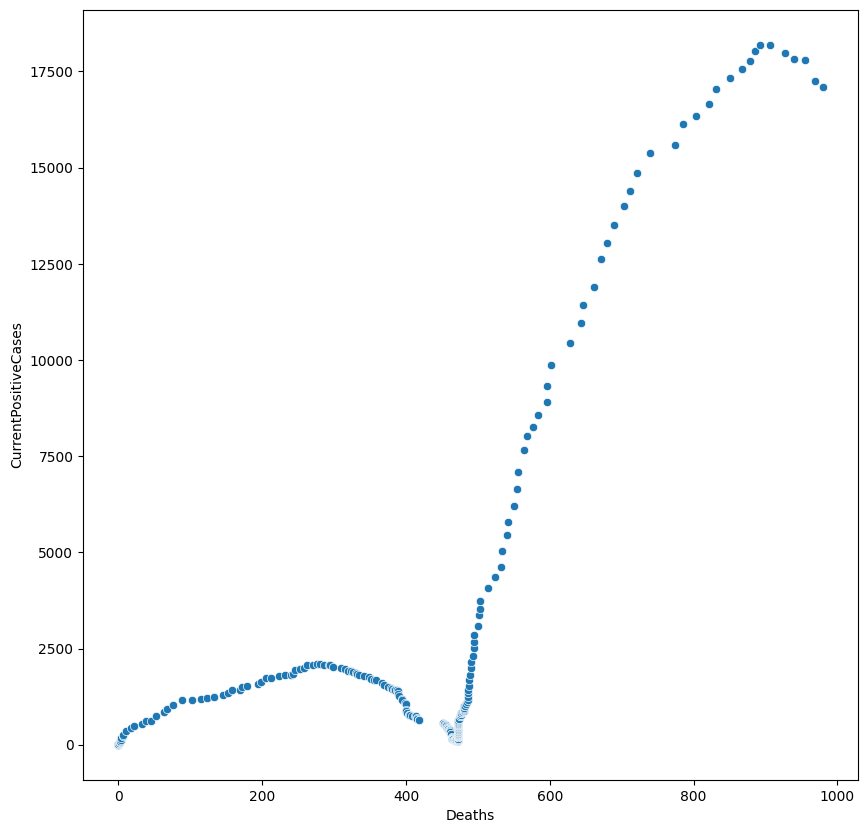

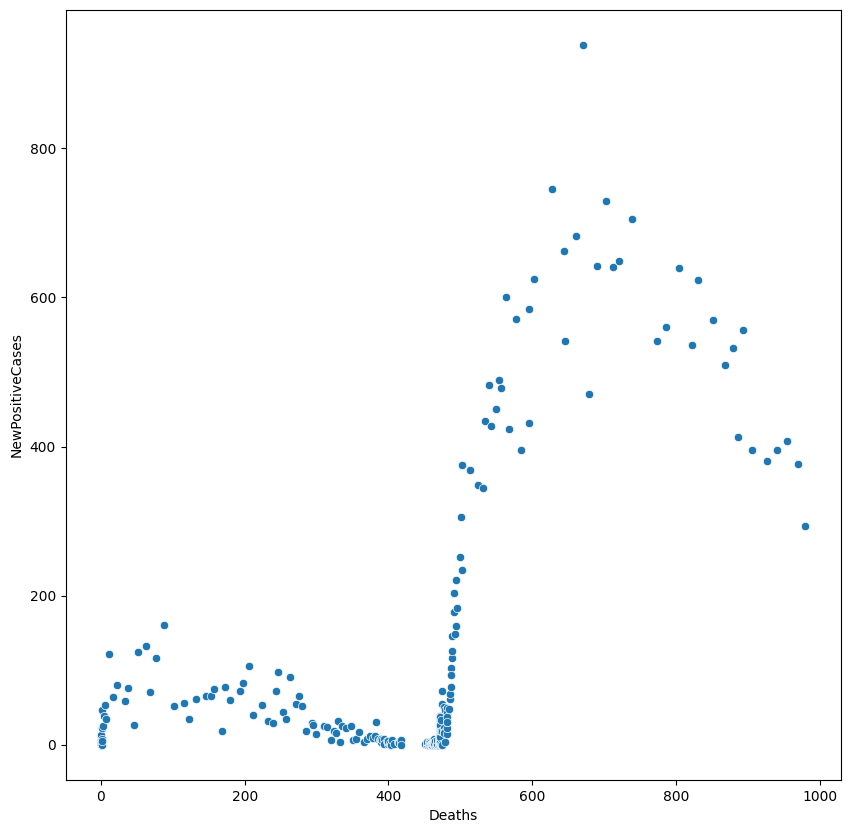

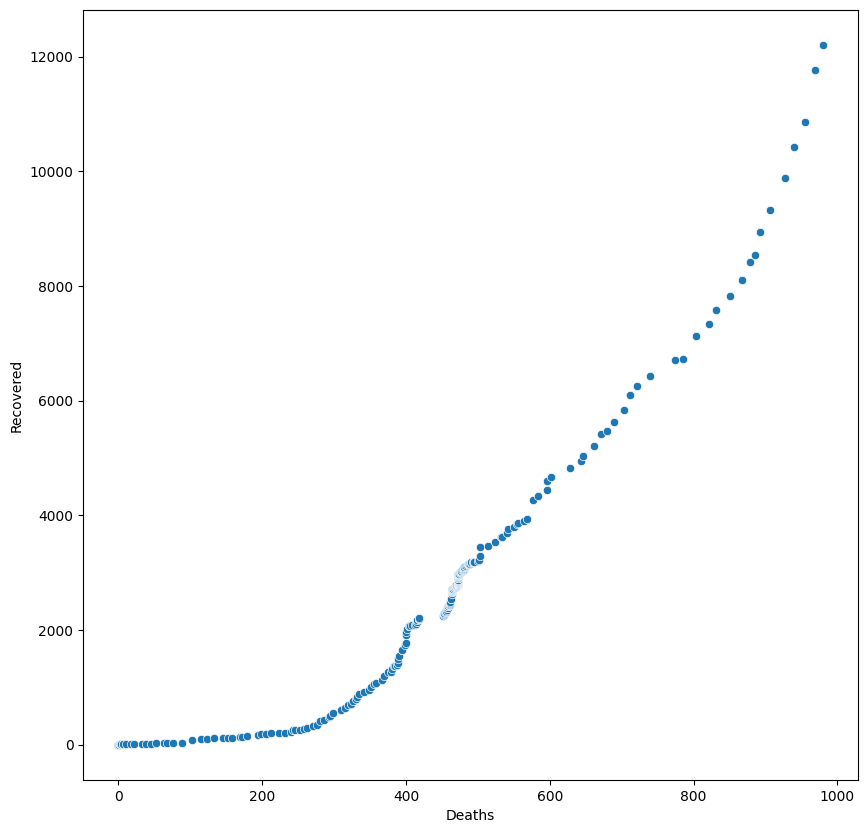

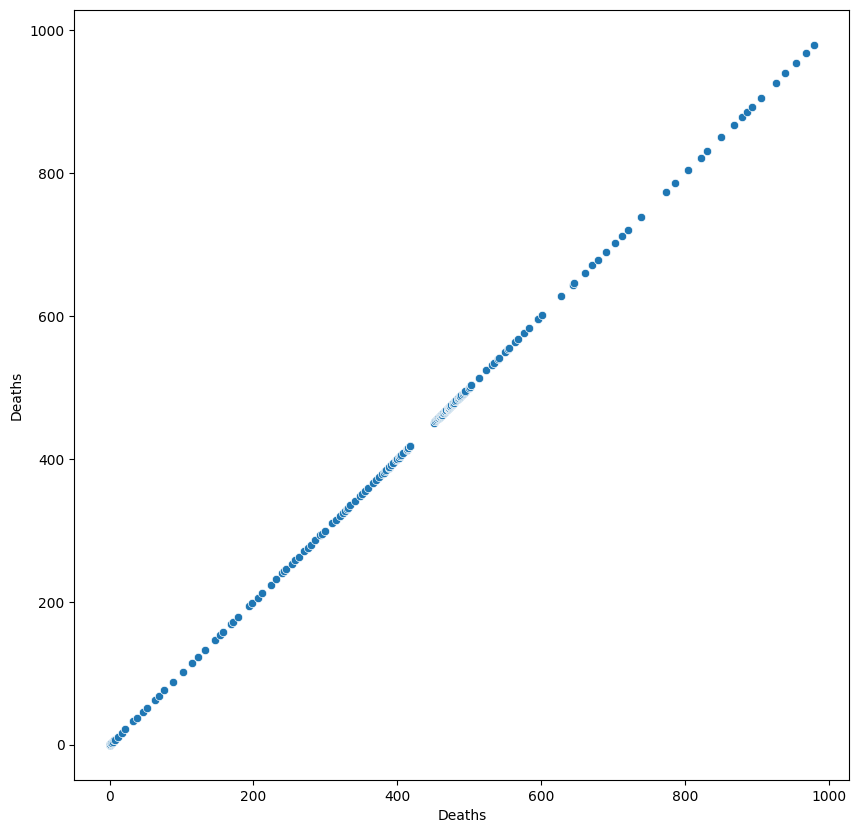

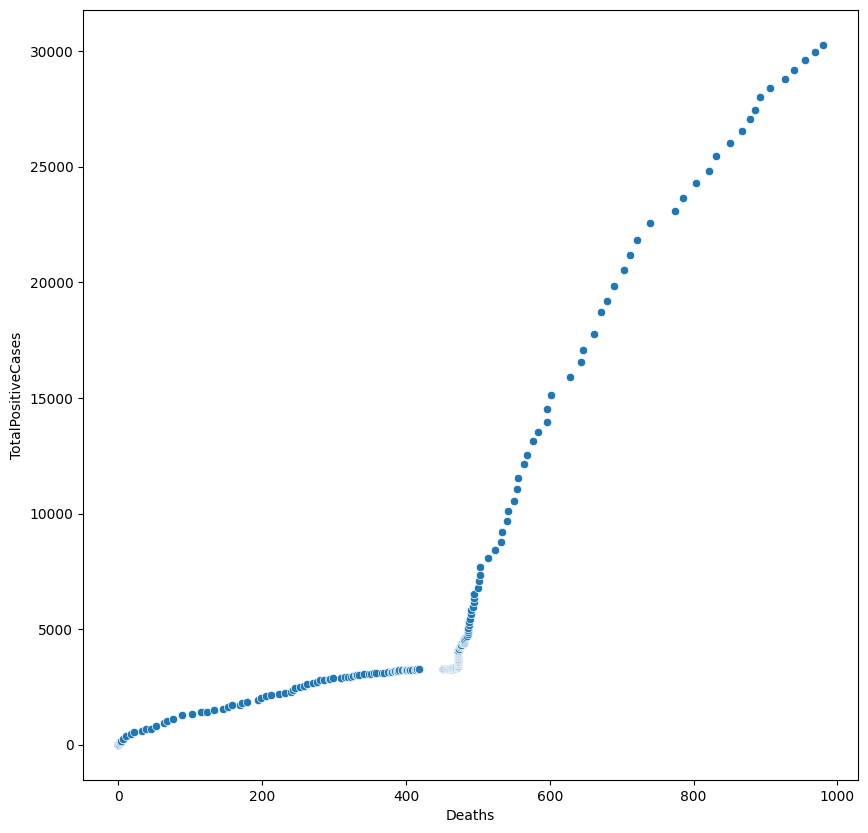

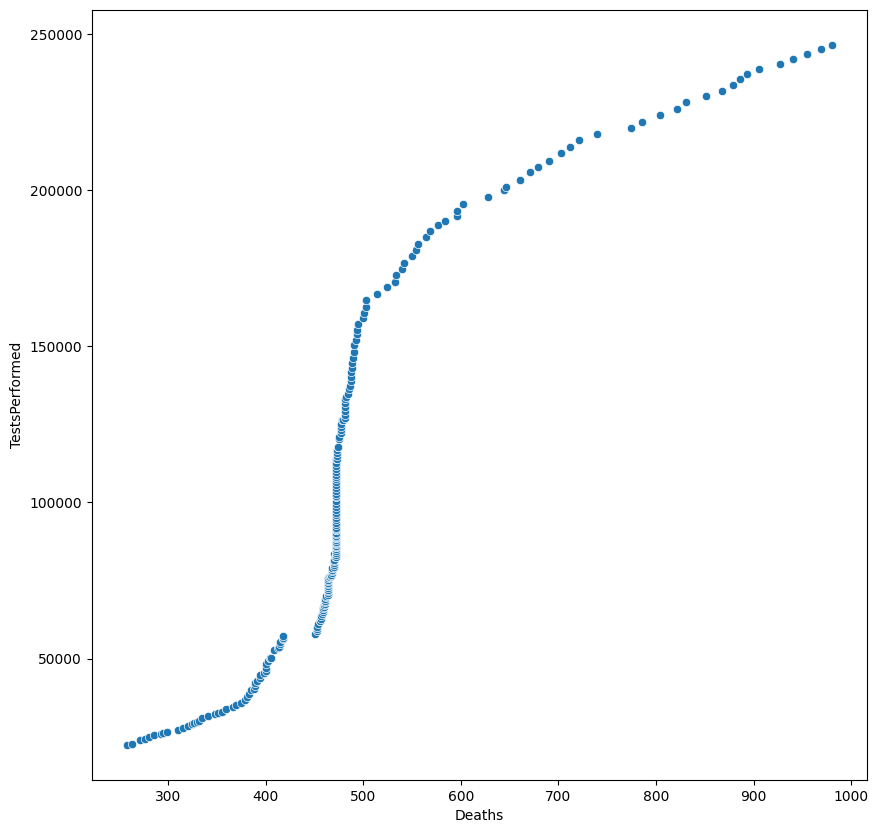

In [8]:
# Analizziamo i dati con un grafico a dispersione tra la variabile 'deaths' e tutte le altre variabili
# per capire se c'è una correlazione tra la variabile 'deaths' e le altre variabili

# creo una lista con tutte le variabili del dataset che non sono 'deaths' e di tipo object

df_copy = df_abruzzo.copy()
df_copy.drop(['SNo', 'RegionCode', 'Latitude', 'Longitude'], axis=1, inplace=True)

# uso il metodo select_dtypes per selezionare le variabili di tipo object
# https://pulplearning.altervista.org/come-filtrare-righe-e-colonne-in-pandas-con-codice-python/
lista_variabili = list(df_copy.select_dtypes(include=['int64', 'float64']).columns)
print(lista_variabili)

# creo un grafico a dispersione tra la variabile 'deaths' e tutte le altre variabili
for variabile in lista_variabili:
    plt.figure(figsize=(10,10))
    sns.scatterplot(y=variabile, x='Deaths', data=df_abruzzo)
    plt.show()

/tmp/ipykernel_20340/2562517740.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_abruzzo['R_TP_De'] = df_abruzzo['TestsPerformed'] / df_abruzzo['Deaths']
/tmp/ipykernel_20340/2562517740.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_abruzzo['R_R_De'] = df_abruzzo['Recovered'] / df_abruzzo['Deaths']


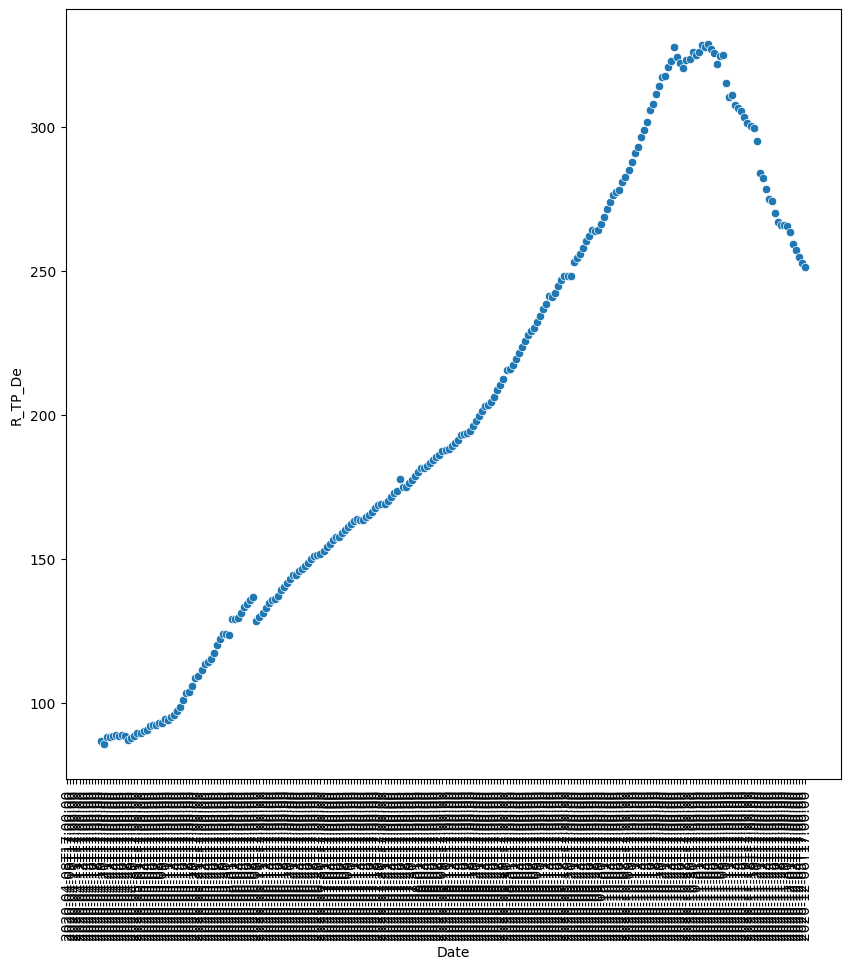

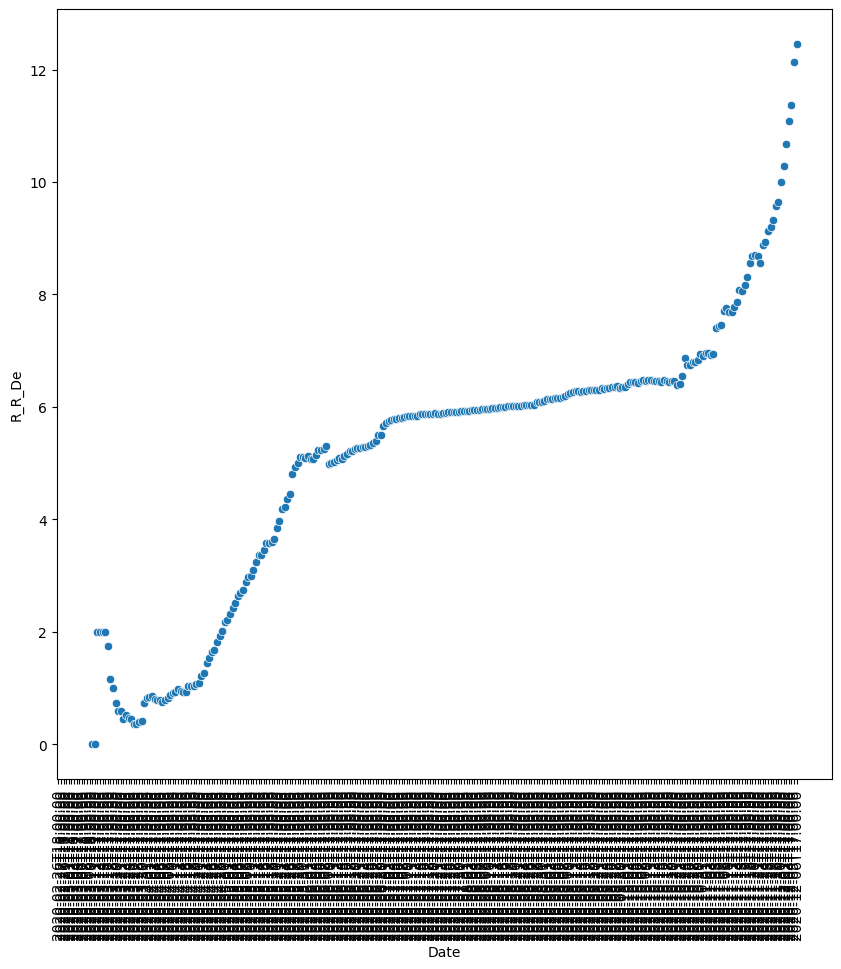

In [13]:
# analizziamo i dati con un grafico a dispersione tra il rapporto tra 'tests performed' e 'Deaths' 
# creaiamo la colonna 'rapporto' e la aggiungiamo al dataframe
df_abruzzo['R_TP_De'] = df_abruzzo['TestsPerformed'] / df_abruzzo['Deaths']
df_abruzzo['R_R_De'] = df_abruzzo['Recovered'] / df_abruzzo['Deaths']

# creo un grafico a dispersione tra la variabile 'R_TP_De' e le date
plt.figure(figsize=(10,10))
sns.scatterplot(y='R_TP_De', x='Date', data=df_abruzzo)
plt.xticks(rotation=90)
plt.show()

# creo un grafico a dispersione tra la variabile 'R_R_De' e le date
plt.figure(figsize=(10,10))
sns.scatterplot(y='R_R_De', x='Date', data=df_abruzzo)
plt.xticks(rotation=90)
plt.show()

In [ ]:
# analizziamo i dati con un grafici a dispersione
# per ogni variabile, traccio un grafico a dispersione rispetto alle altre variabili
# per fare questo, uso la funzione pairplot di seaborn

sns.pairplot(df_abruzzo)
plt.show()
